In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

** You do not need to memorize any of these functions, there is documentation of these libraries online of which are very much useful!**

# Data Exploration

When working with machine learning and large-scale data analysis, there are several important steps to follow to ensure the success of your model. Key tasks include:

- Preprocessing – cleaning and transforming raw data into a usable format.

- Data Encoding/Tokenization – converting categorical data or text into numerical representations.

- Data Sampling – selecting a representative subset of data for training and validation.

These and other steps play a critical role in shaping how well your machine learning model performs, as each phase impacts the accuracy, efficiency, and generalizability of the model.

With all of these different methods, while it's possible to hard-code them, using libraries can greatly simplify and improve the accuracy of your data processing. Prominent libraries like Pandas (for data manipulation and analysis), NumPy (for numerical computing), and Matplotlib (for data visualization) are widely used to streamline complex tasks. These libraries provide efficient, pre-built functions for tasks such as preprocessing, encoding, and sampling, allowing you to focus more on the machine learning model itself rather than low-level coding.









## Pandas

Pandas is a powerful Python library used for data manipulation and analysis. It provides data structures like DataFrames (2D labeled data tables) and Series (1D arrays) to handle and process structured data efficiently. Pandas allows for easy data cleaning, filtering, aggregation, and transformation, making it an essential tool for handling large datasets. It's widely used for tasks such as reading data from files (CSV, Excel), merging datasets, and performing complex operations on data with minimal code.









The provided code below is simply to display how a pandas data frame works.

In [ ]:
# an example pandas dataframe:

Data = [
    {
        "name": "Green Gecko",
        "legs": "four legs",
        "type": "lizard",
        "color": "green",
        "teeth_shape": "sharp"
    },
    {
        "name": "Apple",
        "legs": "no legs",
        "type": "fruit",
        "color": "red",
        "teeth_shape": "none"
    },
    {
        "name": "Chicken",
        "legs": "two legs",
        "type": "bird",
        "color": "white",
        "teeth_shape": "none"
    },
    {
        "name": "Apple",
        "legs": "no legs",
        "type": "fruit",
        "color": "green",
        "teeth_shape": "none"
    },
    {
        "name": "Apple",
        "legs": "no legs",
        "type": "fruit",
        "color": "yellow",
        "teeth_shape": "none"
    },
    {
        "name": "Chicken",
        "legs": "two legs",
        "type": "bird",
        "color": "brown",
        "teeth_shape": "none"
    }
]


# Shown here, when you have a set of data, wether in an array, a .csv file, or more, the Pandas library is very useful in making the data easier to use.

# The reason I put pd.DataFrame is because I imported pandas, and labelled it as pd, you can see this when scrolling up to the top of the guide.

df = pd.DataFrame(Data) # Specifically, this function within pandas turns the data itself into a dataframe.

df # Neat trick with jupyter notebook based softwares, if you put a variable at the end, it will automatically print!
   # However, for variables written down like this before, you would have to put in print statements, or you wont see them.


,name,legs,type,color,teeth_shape
0,Green Gecko,four legs,lizard,green,sharp
1,Apple,no legs,fruit,red,none
2,Chicken,two legs,bird,white,none
3,Apple,no legs,fruit,green,none
4,Apple,no legs,fruit,yellow,none
5,Chicken,two legs,bird,brown,none


###Separating columns

This is a simple way to extract specific columns

In [ ]:
name_column = df['name']  # Calling upon the name of the column and storing that extracts the 'Name' column
legs_and_color = df[['legs', 'color']]  # Extracting the 'Age' and 'City' columns

print(name_column)

print(legs_and_color)

0    Green Gecko
1          Apple
2        Chicken
3          Apple
4          Apple
5        Chicken
Name: name, dtype: object
        legs   color
0  four legs   green
1    no legs     red
2   two legs   white
3    no legs   green
4    no legs  yellow
5   two legs   brown


You could also do it this way:

.iloc is a great way to access columns by their positional index

In [ ]:
name_and_legs = df.iloc[:, [0,1]] # [row, column] (all rows, columns 0 and 1) *********** VERY USEFUL ***********

name_and_legs = df.iloc[:, :2] # [row, column] (all rows, columns 0 and 1) *********** VERY USEFUL ***********

name_and_legs

,name,legs
0,Green Gecko,four legs
1,Apple,no legs
2,Chicken,two legs
3,Apple,no legs
4,Apple,no legs
5,Chicken,two legs


and this:

.loc is a handy tool for selecting columns by their name

In [ ]:
# Extracting 'Name' and 'City' columns using loc
name_and_type = df.loc[:, ['name', 'type']]  # *********** VERY USEFUL ***********

name_and_type


,name,type
0,Green Gecko,lizard
1,Apple,fruit
2,Chicken,bird
3,Apple,fruit
4,Apple,fruit
5,Chicken,bird


###Other commonly used functions

#####Groupby

######Grouping by a single column

In [2]:
import pandas as pd

# Sample data
data_2 = {
    'product': ['A', 'B', 'A', 'C', 'B', 'A'],
    'sales': [100, 150, 200, 300, 250, 50],
    'region': ['North', 'South', 'East', 'West', 'North', 'South']
}

df_2 = pd.DataFrame(data_2)

# Group by 'product' and sum the 'sales'
grouped_sales = df_2.groupby('product')['sales'].sum() # you can do more than just sum, it could also be mean, max, etc

grouped_sales


,sales
product,
A,350
B,400
C,300


######Grouping by multiple columns

In [ ]:
# Group by 'product' and 'region' and sum the 'sales'
grouped_sales_region = df_2.groupby(['product', 'region'])['sales'].sum() # Same thing as grouping by a single column, but you are using more parameters of which you group data

grouped_sales_region


product  region
A        East      200
         North     100
         South      50
B        North     250
         South     150
C        West      300
Name: sales, dtype: int64

######Applying a multiple aggregation function

In [ ]:
# Group by 'product' and apply both sum and mean on 'sales'
grouped_agg = df_2.groupby('product')['sales'].agg(['sum', 'mean']) # How youcan you to get multiple metrics from grouped data

grouped_agg


,sum,mean
product,,
A,350,116.666667
B,400,200.000000
C,300,300.000000


##### Merge & Pivot

######Merge on a common column

In [ ]:
import pandas as pd

# Create two DataFrames
df1 = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})

df2 = pd.DataFrame({
    'id': [1, 2, 3, 5],
    'sales': [100, 200, 150, 300]
})

# Merge DataFrames on the 'id' column
merged_df = pd.merge(df1, df2, on='id')

merged_df


,id,name,sales
0,1,Alice,100
1,2,Bob,200
2,3,Charlie,150


######Merge with different columns

In [ ]:
# DataFrame with different column name for 'id'

df1 = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})

df2 = pd.DataFrame({
    'customer_id': [1, 2, 3, 5],
    'sales': [100, 200, 150, 300]
})

# Merge DataFrames with different column names
merged_df = pd.merge(df1, df2, left_on='id', right_on='customer_id') # If you simply want to merge data that do not have a common column

merged_df


,id,name,customer_id,sales
0,1,Alice,1,100
1,2,Bob,2,200
2,3,Charlie,3,150


#####Pivot

######Converting columns to rows

In [ ]:
# Sample data
data = {
    'product': ['A', 'A', 'B', 'B', 'C', 'C'],
    'region': ['North', 'South', 'North', 'South', 'North', 'South'],
    'sales': [100, 150, 200, 250, 300, 350]
}

df = pd.DataFrame(data)

df

,product,region,sales
0,A,North,100
1,A,South,150
2,B,North,200
3,B,South,250
4,C,North,300
5,C,South,350


In [ ]:
# Pivot the data
pivot_df = df.pivot(index='product', columns='region', values='sales')

pivot_df

region,North,South
product,,
A,100,150
B,200,250
C,300,350


#####Dropna & Fillna

######Dropna

This completely deletes rows with missing values.

In [ ]:
import pandas as pd

# Sample DataFrame with NaN values
data = {'name': ['Alice', 'Bob', 'Charlie', 'David'],
        'age': [25, None, 30, 35],
        'city': ['New York', 'Los Angeles', None, 'Chicago']}

df = pd.DataFrame(data)

# Drop rows with any NaN values
df_cleaned = df.dropna()

df_cleaned


,name,age,city
0,Alice,25.0,New York
3,David,35.0,Chicago


######Fillna

Unlike Dropna, this fills in those unknown values

In [ ]:
# Fill NaN values in 'age' with the mean age

data = {'name': ['Alice', 'Bob', 'Charlie', 'David'],
        'age': [25, None, 30, 35],
        'city': ['New York', 'Los Angeles', None, 'Chicago']}


mean_age = df['age'].mean()
df_filled = df.fillna({'age': mean_age})

print(df_filled)


      name   age         city
0    Alice  25.0     New York
1      Bob  30.0  Los Angeles
2  Charlie  30.0         None
3    David  35.0      Chicago


## More resources for Pandas

When in need, make sure to look at the library documentation, it is a very helpful tool when using libraries.

https://pandas.pydata.org/docs/

##Numpy

NumPy (Numerical Python) is a fundamental library for scientific computing in Python. It provides support for working with large, multi-dimensional arrays and matrices, along with a wide range of mathematical functions to perform operations on these arrays efficiently. NumPy is highly optimized and allows you to work with data in a fast, memory-efficient way.

Some key features of NumPy include:

- Arrays: NumPy's primary data structure is the ndarray, a powerful n-dimensional array object that allows for fast and efficient data manipulation.

- Mathematical Functions: It provides numerous functions for linear algebra, statistics, random number generation, and more.

- Broadcasting: This feature allows for operations on arrays of different shapes, simplifying code and improving performance.

- Integration with Other Libraries: Many popular libraries like Pandas, SciPy, and TensorFlow are built on top of NumPy, making it a core component of the Python data science ecosystem.

In essence, NumPy is essential for handling numerical data and performing array-based computations in Python.



###Array Creation

####Numpy Array

#####Creating an Array

In [ ]:
Array_example =  np.array([[1, 2, 3],
                          [4, 5, 6],
                          [7, 8, 9],
                          [10, 11, 12],
                          [13, 14, 15]])

print("Array:")
print(Array_example)

print("Shape:")
print(Array_example.shape) # .shape is a VERY MUCH used tool within CS, it gives you the shape of your data/array of which you can use to iterate over or inform your decisions.

#Array is also mutable (laible to change)

a = Array_example[0] # 1,2,3

print("Array_example[0]:")
print(a)


a_b = Array_example[:, [0,-1]]
#[ 1  3]
#[ 4  6]
#[ 7  9]
#[10 12]
#[13 15]

print("Array_example[:, [0,-1]]")
print(a_b)





Array:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]
 [13 14 15]]
Shape:
(5, 3)
Array_example[0]:
[1 2 3]
Array_example[:, [0,-1]]
[[ 1  3]
 [ 4  6]
 [ 7  9]
 [10 12]
 [13 15]]


#####Creating a basic array

######Zero_array

In [5]:
zeros_array = np.zeros(3) # Returns an array of only 0, with a shape of your choice.

print(zeros_array)


[0. 0. 0.]


###### Ones Array

In [6]:
ones_array = np.ones(3) # Returns an array of only 1, with a shape of your choice.

print(ones_array)



[1. 1. 1.]


###### Empty array

In [7]:
empty_array = np.empty(4) # Returns an array of extremely low or variable values

print(empty_array)

[4.74920003e-310 0.00000000e+000 3.57725758e-057 6.69092939e-310]


###### Ranged_array

In [8]:
Ranged_array = np.arange(4) # Creates an array of range 0 to (n - 1)

print(Ranged_array)

[0 1 2 3]


###### Linspace array

In [ ]:
Linspace_array = np.linspace(0, 10, num=5) # This is a very important feature that can be used with matplot

# 0 --> starting point
# 10 --> ending point
#num = 5 --> How many subdivisions

#####Indexing and slicing

######Sorting

In [ ]:
array_test = np.array([2, 1, 5, 7, 1, 1, 6, 100])

array_test = np.sort(array_test) # With this method you will be able to take whatever array you have and sort it


###### Indexing

In [ ]:
array_test = np.array([2, 1, 5, 7, 1, 1, 6, 100])

# indexing over the array and obtaining specific values
Array_indexes =  array_test[1]

######Slicing

In [9]:
array_test = np.array([2, 1, 5, 7, 1, 1, 6, 100])

# Slicing works like this: # [start:end:step]

print(f"Slicing to return values between index 1 to 5: {array_test[1:5]}") # slicing array

# Slicing array for having only array values of indices after a index

print(f"Sliced to return values above the 4th index {array_test[4:]}")

# Slicing array for having only array values of indices before a index

print(f"Sliced to return values before the 4th index {array_test[:4]}")

Slicing to return values between index 1 to 5: [1 5 7 1]
Sliced to return values above the 4th index [  1   1   6 100]
Sliced to return values before the 4th index [2 1 5 7]


### Math

###### Trigonometry

In [ ]:
X = (45 * np.pi)/180 # np.pi just gives you the value of pi, im just using pi/4 radians for x

Y = (np.sqrt(2))/2  # This is the value of 45 degrees for botht he x and y coordinate returned on the unit circle for the angle of 45.

np.sin(X) # Sine

np.cos(X) # cosine

np.tan(X) # tangent

np.arcsin(Y) # inverse sine

np.arccos(Y) # inverse cosine

np.arctan(Y) # inverse tangent



###### Rounding


In [ ]:
z = 1.66655534532198

np.round(z, decimals = 2)


###### Sums, Products, Differences

In [ ]:
Array_example =  np.array([1, 2, 3])

np.prod(Array_example) # product of an array

np.sum(Array_example)


###### Exponentials and logrithms

In [ ]:
r = 3

np.exp(r) # e^r

np.expm1(r) # e^r - 1

np.exp2(r) # 2^r

np.log(r)

np.log(r)

np.log10(r)

np.log2(r)


1.0986122886681098

###### Min and Max

In [ ]:
Array_example =  np.array([1, 2, 3])


np.max(Array_example) # returns the maximum value within an array

np.min(Array_example) # returns the minimum value within an array

######Random Number Generation

Within data analysis and especially algorithms of which help to improve models of their accuracy or determine the parameters of which the model itself operates, numpy is stronly reccomended for both its versatility in the math front and array front but also its ability to generate random numbers.

For that, use `np.random`

Example uses for np.random are shown below:

In [ ]:
# The numpy random genarator can genarate a array of random values

Random_array = np.random.default_rng()

Random_array = Random_array.integers(low = 0, high = 10, size= 5)

print(Random_array)

# or just random numbers

num = np.random.randint(low = 0, high = 10)

print(num)

[3 1 3 0 1]
8


## More resources for Numpy

When in need, make sure to look at the library documentation, it is a very helpful tool when using libraries.

https://numpy.org/doc/

## Matplotlib

Matplotlib is a widely used Python library for creating static, interactive, and animated visualizations in a variety of formats. It provides a flexible and powerful framework for producing high-quality plots and charts, making it a popular choice among data scientists, engineers, and researchers.


it enables clear and informative visualizations that enhance data interpretation and communication. Whether creating simple plots or complex multi-plot figures, Matplotlib offers the flexibility and power needed to effectively present data insights.

### Starting and importing a figure

First of all, let us start off with the basics of Matplotlib.


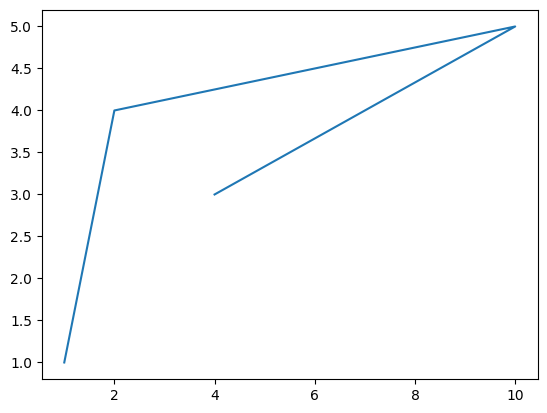

In [ ]:
# First when you are using Matplot.lib you need to intialize the plots of which you will be putting your data on.

fig, ax = plt.subplots() # This ceates a figure with single axes

ax.plot([1, 2, 10, 4], [1, 4, 5, 3]) # This enables you to add in points, and this connects them

plt.show() # allows you to get the plot



### Scatter plots

Matplotlib allows you  plot scatter plots, of which helps you visualize your data.

As an example, think about when your analyzing your data and looking for clustering effects.

matplotlib is a very useful tool for that!

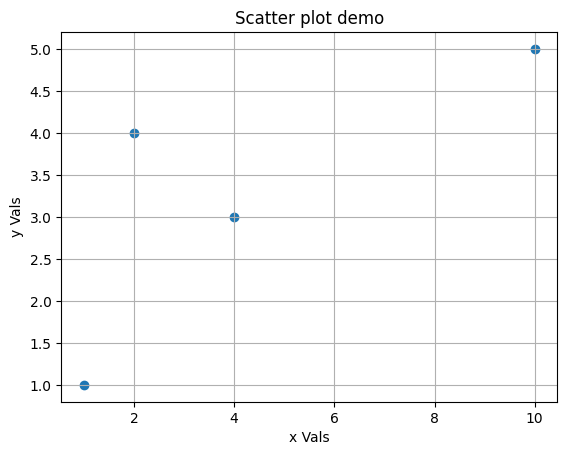

In [ ]:
# First when you are using Matplotlib you need to intialize the plots of which you will be putting your data on.

fig, ax = plt.subplots() # this creates a figure with single axes

ax.scatter([1, 2, 10, 4], [1, 4, 5, 3]) # This enables you to add in points scatter wise

ax.grid(visible = True) # This simply allows you to create grids

plt.xlabel('x Vals') # labels the x axis

plt.ylabel('y Vals') # labels the y axis

plt.title('Scatter plot demo') # title for the graph

plt.show() # allows you to get the graph


### Histograms

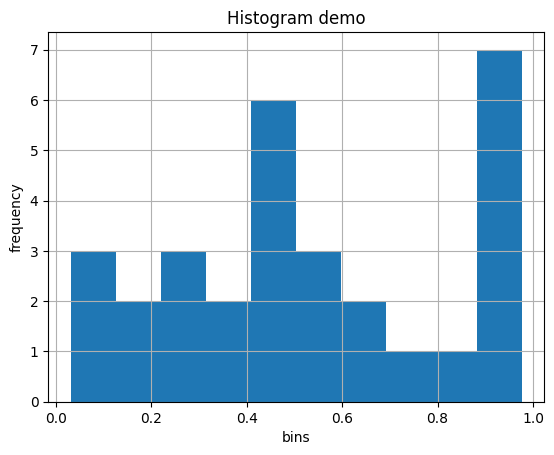

In [ ]:
# First when you are using Matplotlib you need to intialize the plots of which you will be putting your data on.

x = np.random.rand(6,5) # creates a array of random values with a dimension 50 rows x 5 columns

counts, bins = np.histogram(x) # this creates a histogram

plt.hist(bins[:-1], bins, weights=counts) # enter in histogram values

plt.grid(visible = True) # This simply allows you to create grids

plt.xlabel('bins') # labels the x axis

plt.ylabel('frequency') # labels the y axis

plt.title('Histogram demo') # title for the graph

plt.show() # allows you to get the plot


### Plotting

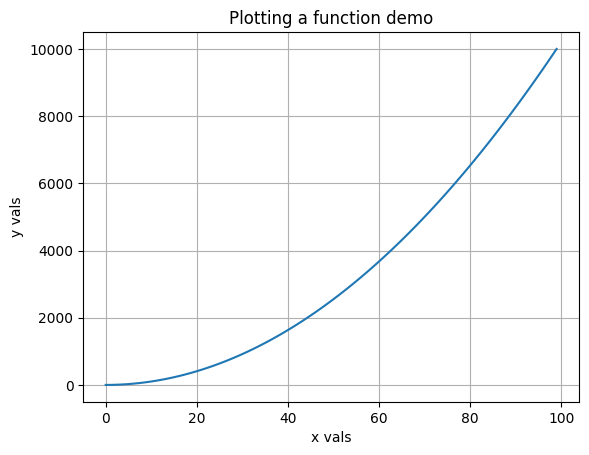

In [ ]:
# First when you are using Matplotlib you need to intialize the plots of which you will be putting your data on.

fig, ax = plt.subplots() # this creates a figure with single axes

x  = np.linspace(0, 100, 100) # Segments an array of which creates a 100 values between 1 and 100.

ax.plot(x**2) # This enables you to plot functions, of which is very important when analyzing data or a model

plt.grid(visible = True) # This simply allows you to create grids

plt.xlabel('x vals') # labels the x axis

plt.ylabel('y vals') # labels the y axis

plt.title('Plotting a function demo') # title for the graph

plt.show() # allows you to get the plot


## More resources for Numpy

When in need, make sure to look at the library documentation, it is a very helpful tool when using libraries.

https://numpy.org/doc/